In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime, timedelta
from tqdm import tqdm

import sys
sys.path.append("..")

from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose


#### Helper functions

In [3]:
from functions import (
    missingValues,
    df_security_code,
    print_shape, 
    date_range, 
    plot_stock
)

In [4]:
sns.color_palette("tab10")
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# plots 
sns.set_context('talk', font_scale=1)
plt.style.use(['ggplot'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})

# Data


## stock_list.csv

In [5]:
stock_list = pd.read_csv('../data/stock_list.csv', parse_dates=['EffectiveDate', 'TradeDate'])

In [6]:
stock_list.head(2)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,2021-12-30,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,2021-12-30,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False


number of securities

In [7]:
stock_list.SecuritiesCode.nunique()

4417

distribution of the stocks into 33 Sectors

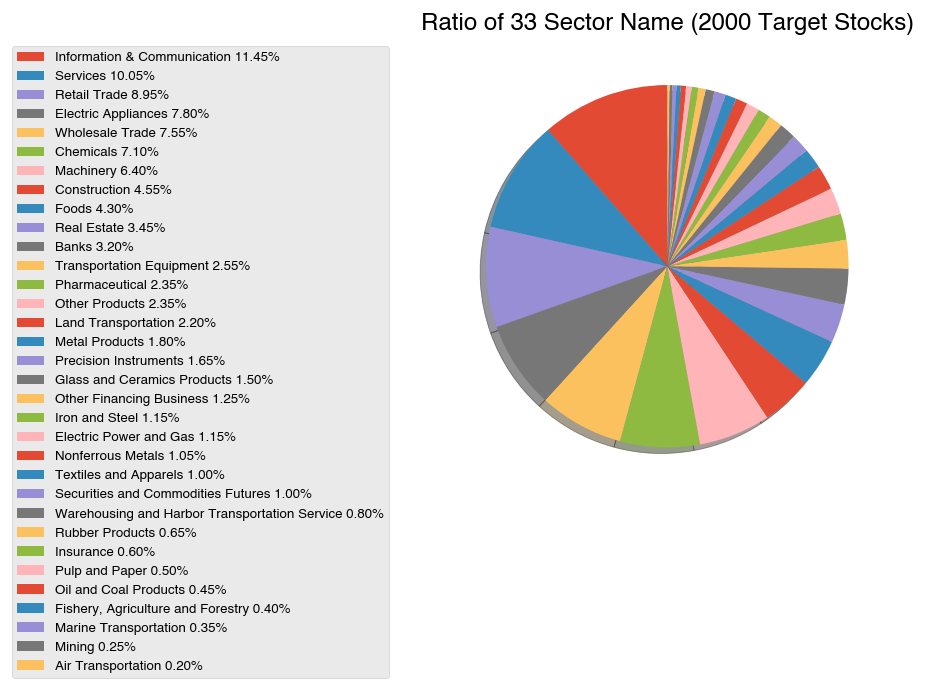

In [8]:
target_stock_list = stock_list[stock_list['Universe0']]
sec_33_val_cnt = target_stock_list['33SectorName'].value_counts()
pct = sec_33_val_cnt / sec_33_val_cnt.sum() * 100
labels = [f"{sec} {ratio:.2f}%" for sec, ratio in zip(sec_33_val_cnt.index, pct)]

fig, ax = plt.subplots(figsize=(10, 5))
patches, texts = ax.pie(sec_33_val_cnt.values, 
                        #colors=sns.color_palette("pastel"), 
                        shadow=True, 
                        startangle=90)
patches, labels, dummy = zip(*sorted(zip(patches, labels, sec_33_val_cnt.values),
                                     key=lambda x: x[2],
                                     reverse=True))
ax.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=8)
ax.set_title("Ratio of 33 Sector Name (2000 Target Stocks)")
plt.show()

distribution of the stocks into 17 Sectors

In [9]:
sec_17_val_cnt = target_stock_list['17SectorName'].value_counts()
pct = sec_17_val_cnt / sec_17_val_cnt.sum() * 100

sec_17_val_cnt


industries = pd.DataFrame(sec_17_val_cnt)

industries['pct'] = pct
industries

,17SectorName,pct
"IT & SERVICES, OTHERS",477,23.85
ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,189,9.45
RETAIL TRADE,179,8.95
RAW MATERIALS & CHEMICALS,172,8.60
CONSTRUCTION & MATERIALS,157,7.85
COMMERCIAL & WHOLESALE TRADE,151,7.55
MACHINERY,128,6.40
FOODS,94,4.70
TRANSPORTATION & LOGISTICS,71,3.55
REAL ESTATE,69,3.45


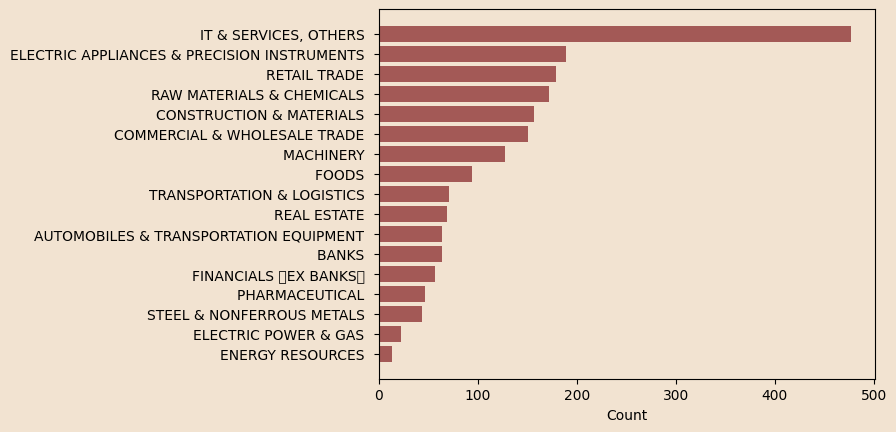

In [10]:
sec_17_val_cnt = target_stock_list['17SectorName'].value_counts()
pct = sec_17_val_cnt / sec_17_val_cnt.sum() * 100

sec_17_val_cnt

industries = pd.DataFrame(sec_17_val_cnt)
industries['pct'] = pct
industries.sort_values('pct', ascending=False)
y_pos = np.arange(len(industries))
# #3E4953
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y_pos, industries['17SectorName'].sort_values(ascending=True),align='center', color='#A35956')
ax.set_yticks(y_pos, labels=reversed(industries.index))
plt.xlabel('Count')

ax.set_facecolor('#F2E3D1')
fig.patch.set_facecolor('#F2E3D1')
plt.rcParams["font.family"] = "Hind Siliguri"

top 5 stocks accoring the market capitalization

In [11]:
stock_list.sort_values('MarketCapitalization', ascending=False).head(5)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
137,1557,2021-12-30,SPDR S&P500 ETF Trust,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,54920.0,9.503321e+08,5.219224e+13,False
3065,7203,2021-12-30,TOYOTA MOTOR CORPORATION,First Section (Domestic),Prime Market,3700,Transportation Equipment,6,AUTOMOBILES & TRANSPORTATION EQUIPMENT,1,TOPIX Core30,20211230.0,2105.5,1.631499e+10,3.435121e+13,True
2804,6758,2021-12-30,SONY GROUP CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,14475.0,1.261082e+09,1.825416e+13,True
2867,6861,2021-12-30,KEYENCE CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,72280.0,2.432077e+08,1.757905e+13,True
2,1306,2021-12-30,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False


In [12]:
prices = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=[1])
sec_codes = prices.SecuritiesCode.unique()
del prices

date observation for the stock list

In [13]:
date = stock_list.EffectiveDate
date_desc = date.describe(datetime_is_numeric=True)
date_min = date_desc.loc['min']
date_max = date_desc.loc['max']
print('Data from {:%Y-%m-%d} to {:%Y-%m-%d}'
            .format(date_min, date_max))
print('Data observations {} '.format(
                    date.nunique()))

Data from 2000-01-01 to 2022-02-25
Data observations 10 


filter the stock list with the codes used in stock prices and save it

In [14]:
stock_list = stock_list[stock_list['SecuritiesCode'].isin(sec_codes)]
stock_list.to_csv('../data/stock_list_2000.csv')

In [15]:
del stock_list

## Financials

In [16]:
financial = pd.read_csv('../data/train_files/financials.csv', parse_dates=['Date'])

In [17]:
financial.head(2)

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0


remove the revision for furhter processing

In [18]:
# drop 
financial = financial.query('TypeOfDocument != ["ForecastRevision", "ForecastRevision_REIT"]')

In [19]:
financial.head(2)

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0


select columns used to feature engineering

In [20]:
liste =[ 'Date', 'SecuritiesCode', 'Profit', 'NetSales', 'OperatingProfit', 'BookValuePerShare',
        'ForecastDividendPerShareFiscalYearEnd',
        'ForecastDividendPerShareAnnual', 'ForecastNetSales',
        'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
        'ForecastEarningsPerShare']

financial = financial[liste]
financial.head(2)

,Date,SecuritiesCode,Profit,NetSales,OperatingProfit,BookValuePerShare,ForecastDividendPerShareFiscalYearEnd,ForecastDividendPerShareAnnual,ForecastNetSales,ForecastOperatingProfit,ForecastOrdinaryProfit,ForecastProfit,ForecastEarningsPerShare
0,2017-01-04,2753.0,1494000000,22761000000,2147000000,2671.42,50.0,100.0,31800000000,3255000000,3300000000,2190000000,319.76
1,2017-01-04,3353.0,629000000,22128000000,820000000,NaN,36.0,72.0,30200000000,1350000000,1300000000,930000000,485.36


In [21]:
#financial.SecuritiesCode.nunique()
# Selecting only matching Codes from financial data
prices = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=[1])
sec_codes = [x for x in prices.SecuritiesCode.unique() if x in financial.SecuritiesCode.unique()]


In [22]:
print_shape(financial)

 Shape:
 ----------------------------------------
 Observations:   75.6K
 Features:       13
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['Date', 'SecuritiesCode', 'Profit', 'NetSales', 'OperatingProfit',
       'BookValuePerShare', 'ForecastDividendPerShareFiscalYearEnd',
       'ForecastDividendPerShareAnnual', 'ForecastNetSales',
       'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
       'ForecastEarningsPerShare'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
BookValuePerShare,39868.0,52.71
ForecastOperatingProfit,8362.0,11.05
ForecastOrdinaryProfit,7164.0,9.47
ForecastNetSales,7045.0,9.31
ForecastEarningsPerShare,6956.0,9.20
ForecastProfit,6166.0,8.15
OperatingProfit,2195.0,2.90
ForecastDividendPerShareFiscalYearEnd,1584.0,2.09
ForecastDividendPerShareAnnual,1583.0,2.09
Profit,261.0,0.35


In [23]:
del financial

## Options

In [24]:
options = pd.read_csv('../data/train_files/options.csv', parse_dates=[1])

In [25]:
options.head(2)

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0


In [26]:
print_shape(options, missing=False)

 Shape:
 ----------------------------------------
 Observations:   3.57M
 Features:       31
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['DateCode', 'Date', 'OptionsCode', 'WholeDayOpen', 'WholeDayHigh',
       'WholeDayLow', 'WholeDayClose', 'NightSessionOpen', 'NightSessionHigh',
       'NightSessionLow', 'NightSessionClose', 'DaySessionOpen',
       'DaySessionHigh', 'DaySessionLow', 'DaySessionClose', 'TradingVolume',
       'OpenInterest', 'TradingValue', 'ContractMonth', 'StrikePrice',
       'WholeDayVolume', 'Putcall', 'LastTradingDay', 'SpecialQuotationDay',
       'SettlementPrice', 'TheoreticalPrice', 'BaseVolatility',
       'ImpliedVolatility', 'InterestRate', 'DividendRate', 'Dividend'],
      dtype='object')
----------------------------------------


- codes : more than securites code

In [27]:
options.OptionsCode.nunique()

14732

In [28]:
del options

## Submission

In [29]:
submission = pd.read_csv('../data/example_test_files/sample_submission.csv', date_parser=[0])


In [30]:
print_shape(submission, False)

 Shape:
 ----------------------------------------
 Observations:   112K
 Features:       3
 Feature Date:    object
----------------------------------------
Index(['Date', 'SecuritiesCode', 'Rank'], dtype='object')
----------------------------------------


In [31]:
submission.nunique()

Date                56
SecuritiesCode    2000
Rank              2000
dtype: int64

In [32]:
submission.head(2)

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,0
1,2021-12-06,1332,1


Target: calculate the rank for each security code for the next 56 working days

In [33]:
del submission

## Stock prices

In [34]:
prices = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=[1])
print_shape(prices)

 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       12
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
ExpectedDividend,2313666.0,99.19
Open,7608.0,0.33
High,7608.0,0.33
Low,7608.0,0.33
Close,7608.0,0.33
Target,238.0,0.01
RowId,0.0,0.00
Date,0.0,0.00
SecuritiesCode,0.0,0.00
Volume,0.0,0.00


In [35]:
prices.head(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324


### - Date

In [36]:
date = prices.Date
date_desc = date.describe(datetime_is_numeric=True)
date_min = date_desc.loc['min']
date_max = date_desc.loc['max']
print('Data from {:%Y-%m-%d} to {:%Y-%m-%d}'
        .format(date_min, date_max))
print('Data observations {} '.format(
                 date.nunique()))

Data from 2017-01-04 to 2021-12-03
Data observations 1202 


- amount of trades each day

In [37]:
count = pd.DataFrame(prices.SecuritiesCode.value_counts())

In [38]:
count = pd.DataFrame(prices.Date.value_counts())
count.columns = ['Securities']


count.head(2)

,Securities
2021-12-03,2000
2021-04-08,2000


Text(0.5, 0, 'Date')

findfont: Font family ['Hind Siliguri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hind Siliguri'] not found. Falling back to DejaVu Sans.


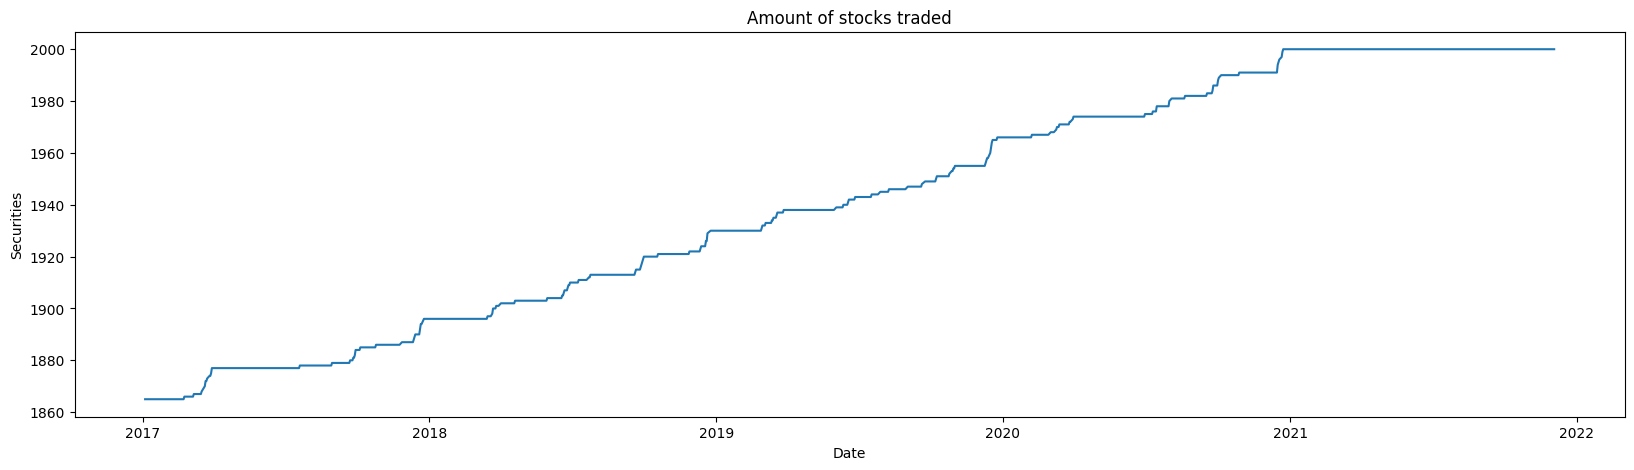

In [39]:

plt.figure(figsize = (20,5))
sns.lineplot(data = count, x= count.index, y ='Securities')
plt.title('Amount of stocks traded')
plt.xlabel('Date')

are stocks added during the time? 
compare the stocks in 1 feb 2017 with the stocks in 1 Feb 2121 

In [40]:
# stock for each days
feb2017 = prices[prices['Date']=='2017-2-1']
feb2021 = prices[prices['Date']=='2021-2-1']

print('SecuritiesCode for Feb 2017 : {} \nSecuritiesCode for Feb 2021 : {}'. format(
                                    feb2017.SecuritiesCode.nunique(), feb2021.SecuritiesCode.nunique()
))

SecuritiesCode for Feb 2017 : 1865 
SecuritiesCode for Feb 2021 : 2000


In [41]:
# new Securites Code in 2021
codes_2017 = feb2017.SecuritiesCode.to_list()
new_codes = feb2021[~feb2021['SecuritiesCode'].isin(codes_2017)]
old_codes = feb2021[~feb2021['SecuritiesCode'].isin(new_codes.SecuritiesCode.to_list())]
print(f'new codes since 2017: {new_codes.SecuritiesCode.count()}')
#print(old_codes.SecuritiesCode.count())

new codes since 2017: 135


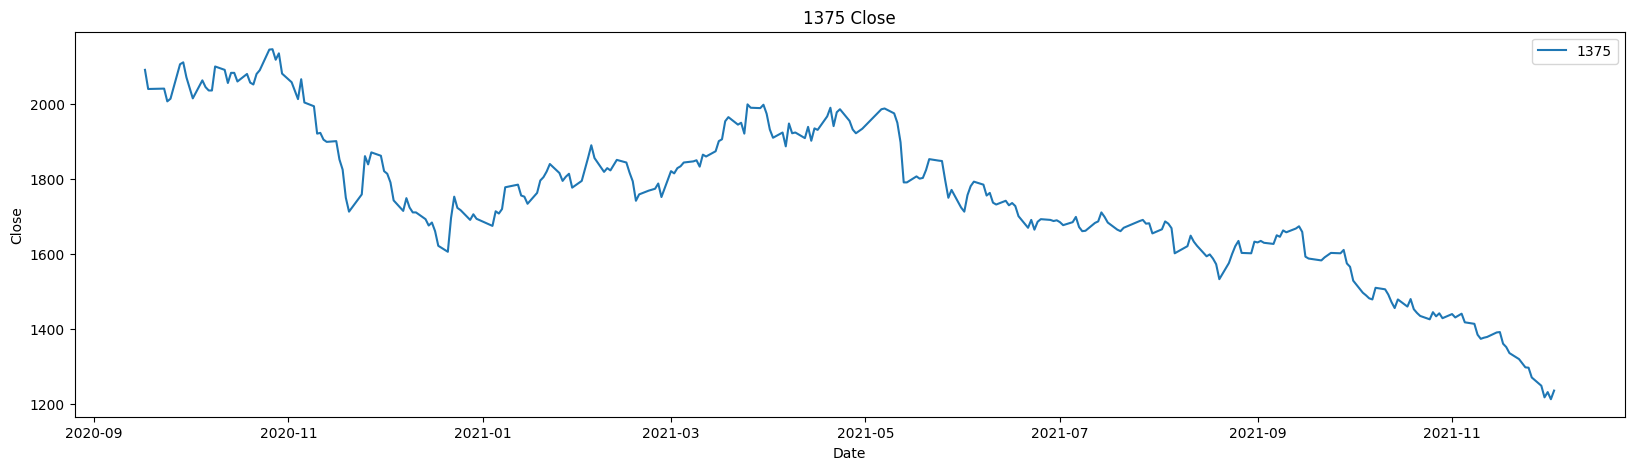

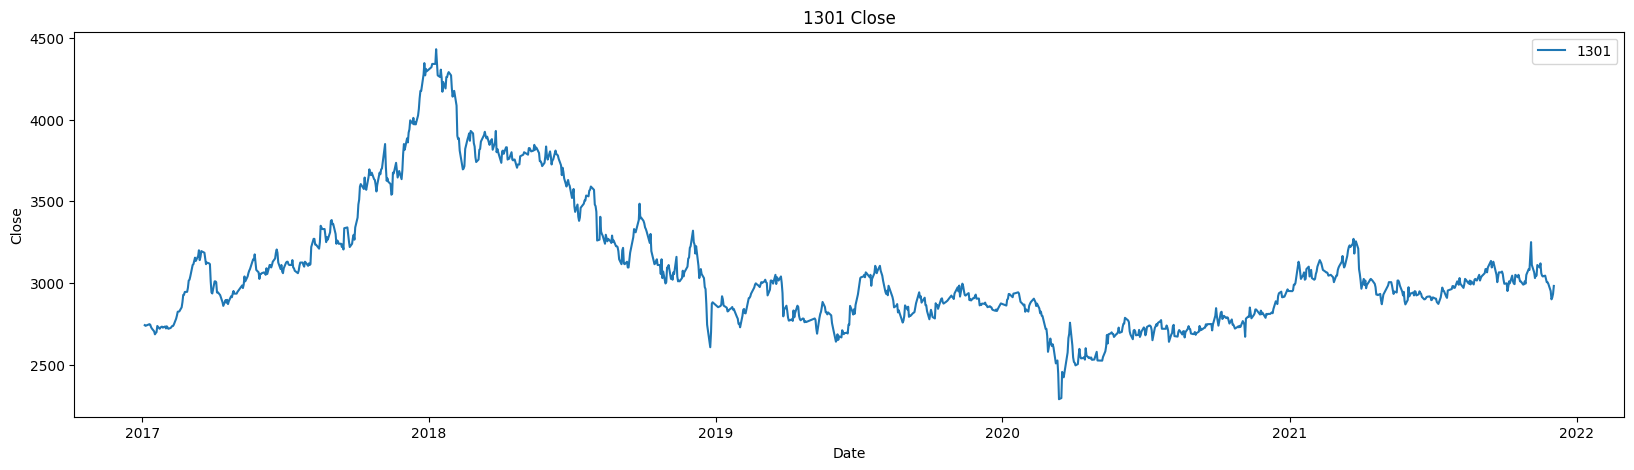

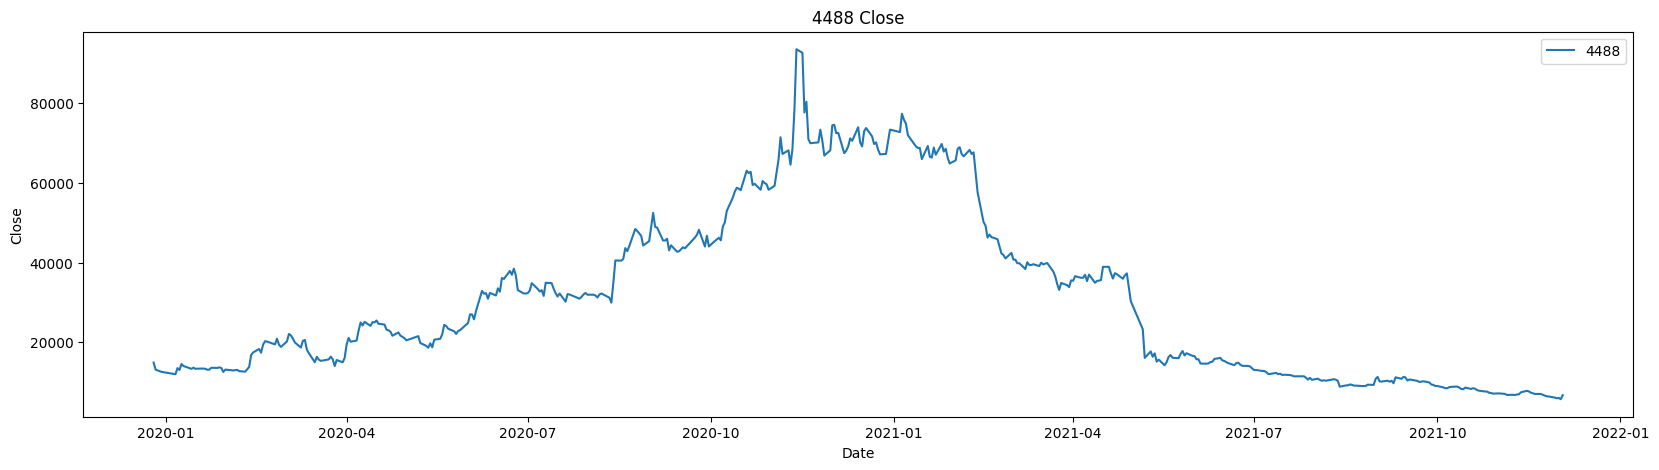

In [42]:
#fig, ax = plt.subplots(figsize=(20,5))
for cod in [1375, 1301, 4488]:
    plot_stock(prices, code=cod, feature='Close')
    #ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

there are 135 Securities codes not listed in 2017. 
may be they were launch later. 

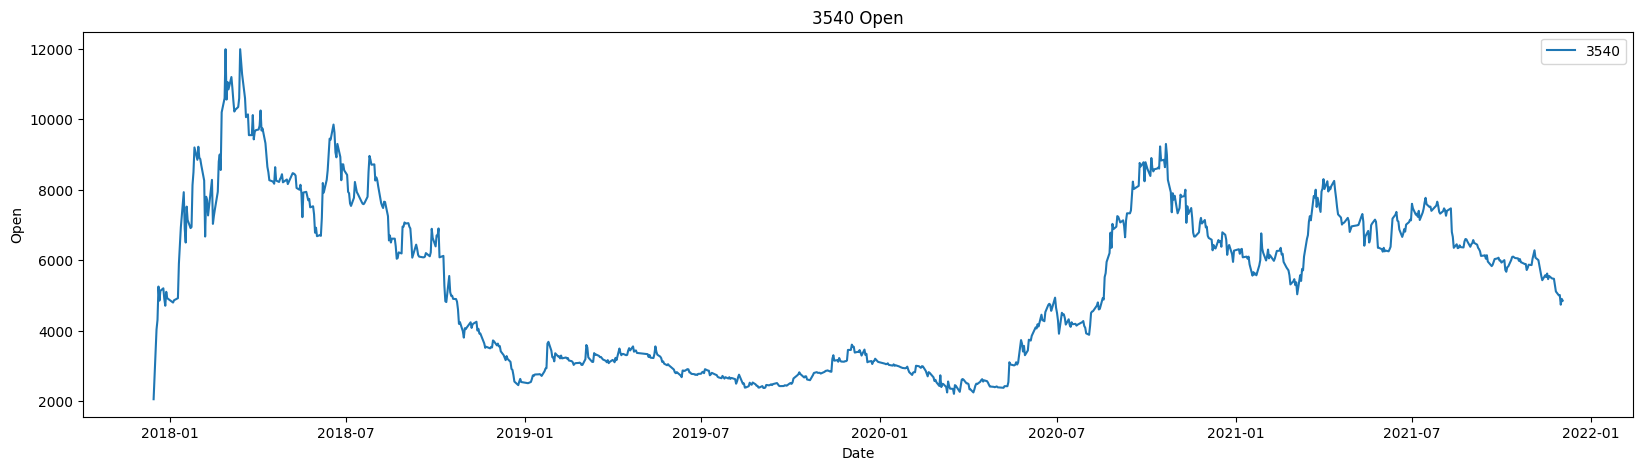

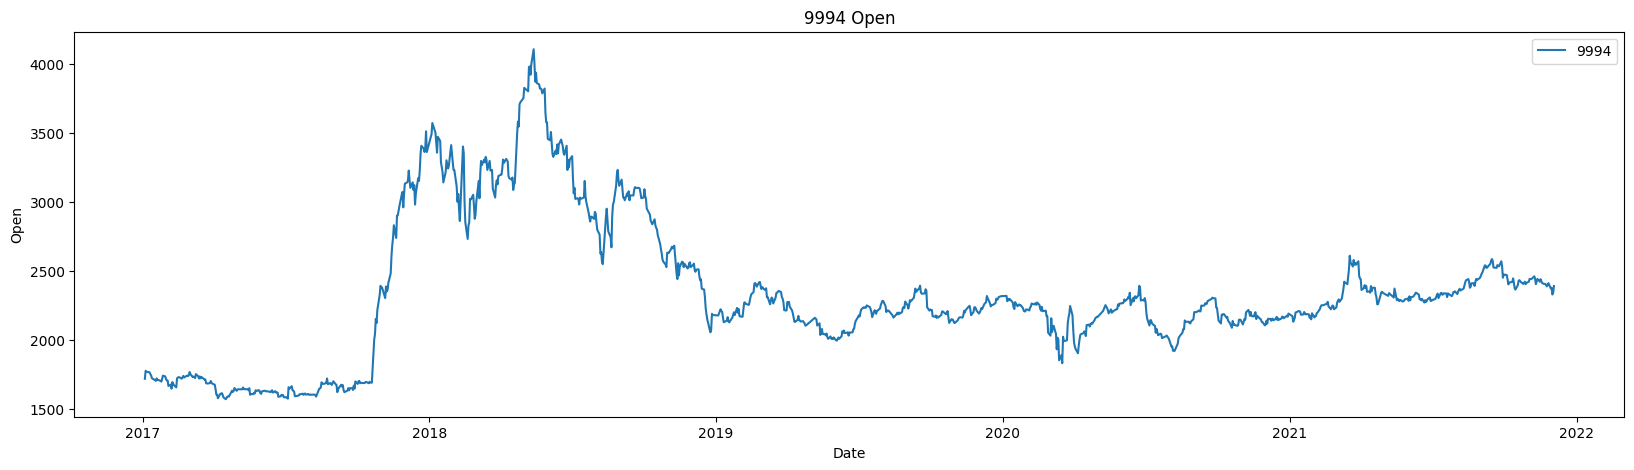

In [43]:
#plt.figure(figsize=(16,10))#
plot_stock(prices, 3540,'Open')
plot_stock(prices, 9994,'Open')



distribution of the nan values

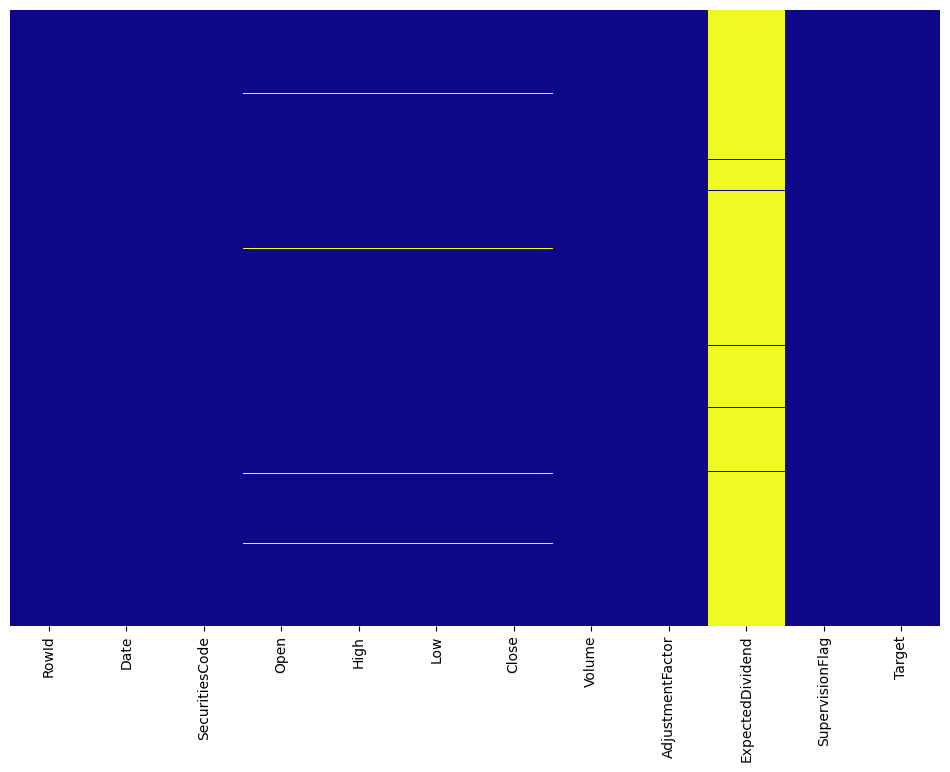

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(prices.isna(), cbar=False, cmap="plasma",yticklabels=False)
plt.show()

prices with nan values: 

In [45]:
prices_nan = prices.query('Open != Open')
print_shape(prices_nan)

 Shape:
 ----------------------------------------
 Observations:   7.61K
 Features:       12
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
Open,7608.0,100.00
High,7608.0,100.00
Low,7608.0,100.00
Close,7608.0,100.00
ExpectedDividend,7584.0,99.68
Target,238.0,3.13
RowId,0.0,0.00
Date,0.0,0.00
SecuritiesCode,0.0,0.00
Volume,0.0,0.00


days with nan values

In [46]:
prices_nan.Date.value_counts()

2020-10-01    1988
2017-03-16      15
2019-10-09      14
2019-04-04      14
2021-10-29      13
              ... 
2017-12-25       1
2017-12-26       1
2020-03-13       1
2018-01-04       1
2018-02-21       1
Name: Date, Length: 1175, dtype: int64

20-10-01:  The Failure of Equity Trading System on October 1, 2020 

- forward fill for 1-10-2020
- forward fill for missing values

In [47]:
prices_wo_nan = prices.query('Date != "2020-10-01" and Open == Open')

In [48]:
prices_wo_nan.isnull().sum().sort_values(ascending=False)

ExpectedDividend    2306082
RowId                     0
Date                      0
SecuritiesCode            0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
AdjustmentFactor          0
SupervisionFlag           0
Target                    0
dtype: int64

### SupervisionFlag
Flag of Securities Under Supervision & Securities to Be Delisted
https://www.jpx.co.jp/english/listing/market-alerts/supervision/00-archives/index.html )


If a stock is designated as Securities Under Supervision or Securities to Be Delisted during the private period, it will be excluded from investment after the date of designation

In [49]:
prices.SupervisionFlag.value_counts()

False    2331036
True        1495
Name: SupervisionFlag, dtype: int64

securities with supervision flag

In [50]:

w_flag = prices[(prices['SupervisionFlag']==True)]
w_flag.shape


(1495, 12)

In [51]:
w_flag.head(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
92438,20170315_6502,2017-03-15,6502,199.9,205.5,186.5,189.5,379973000,1.0,NaN,True,0.035403
94305,20170316_6502,2017-03-16,6502,188.6,192.2,181.6,183.6,211415000,1.0,NaN,True,0.033666


In [52]:
print(f'Securities codes with flag: {w_flag.SecuritiesCode.nunique()} ')
print(f'Securities codes: {w_flag.SecuritiesCode.unique()} : ')

Securities codes with flag: 15 
Securities codes: [6502 3540 6637 6465 7868 6067 6470 4526 5008 5486 3919 2729 3001 8806
 4699] : 


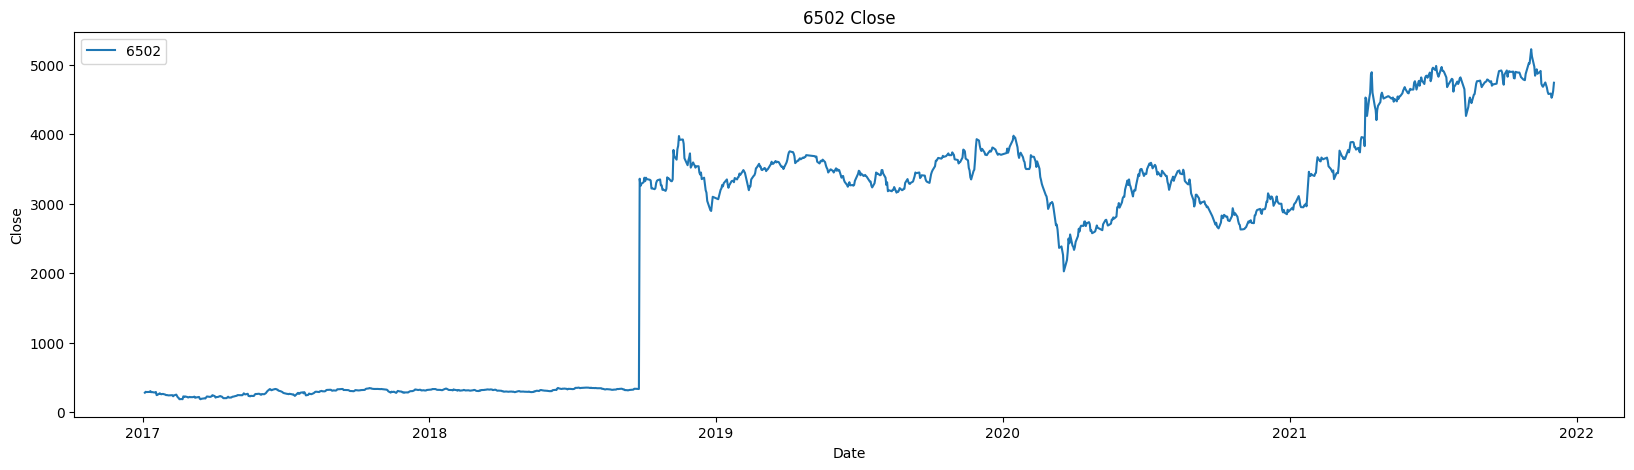

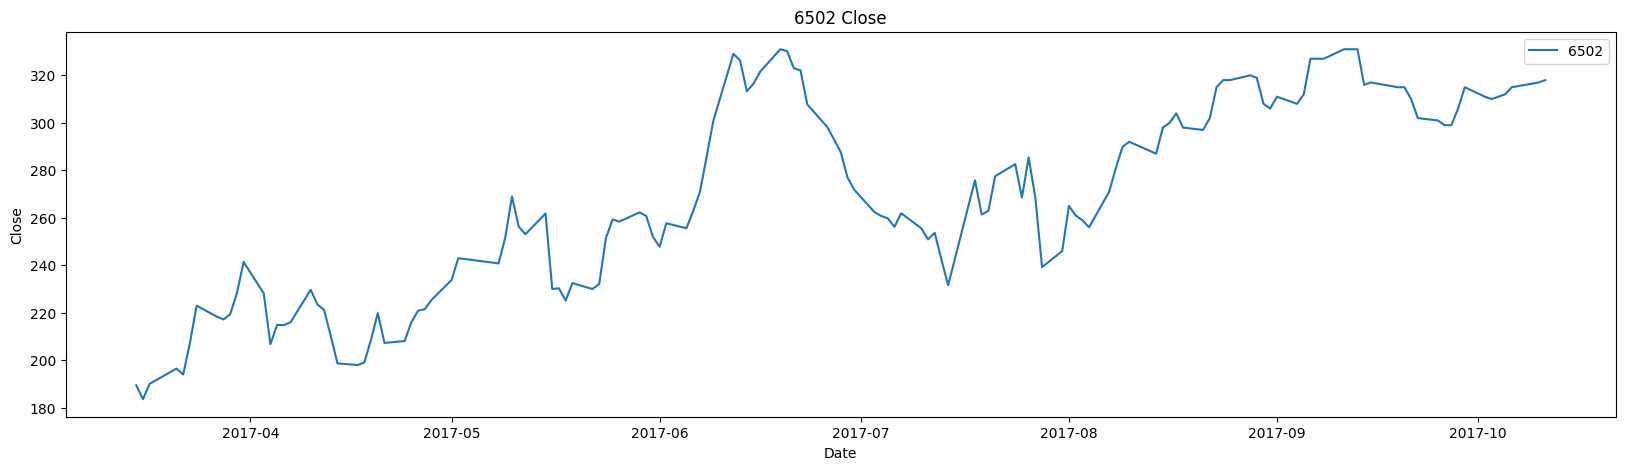

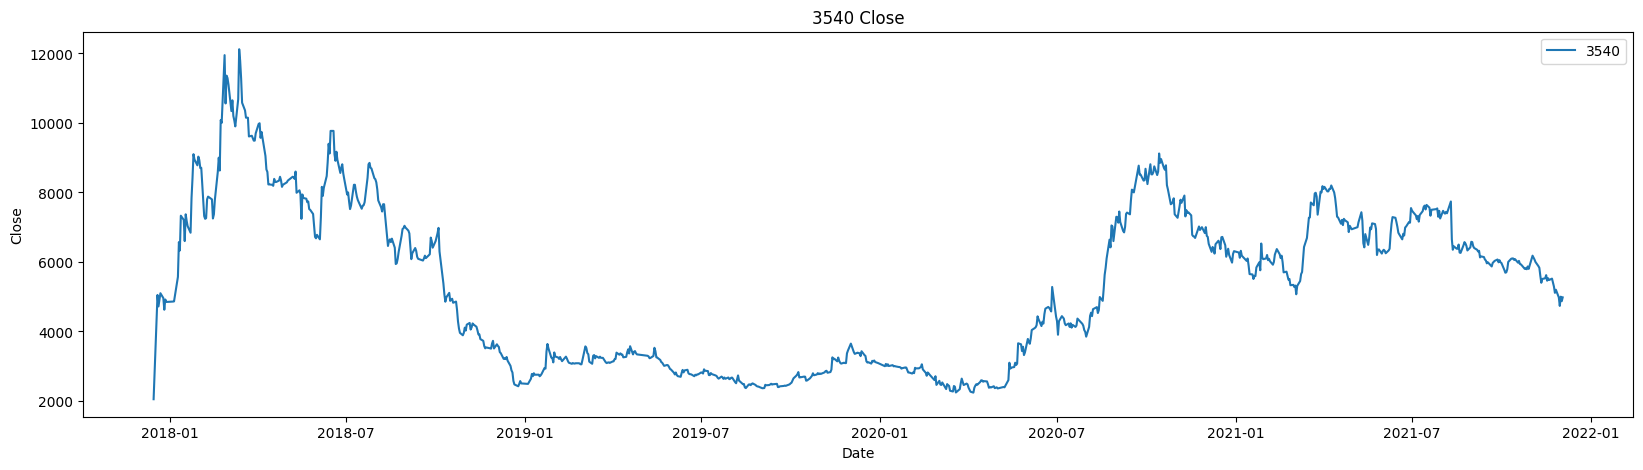

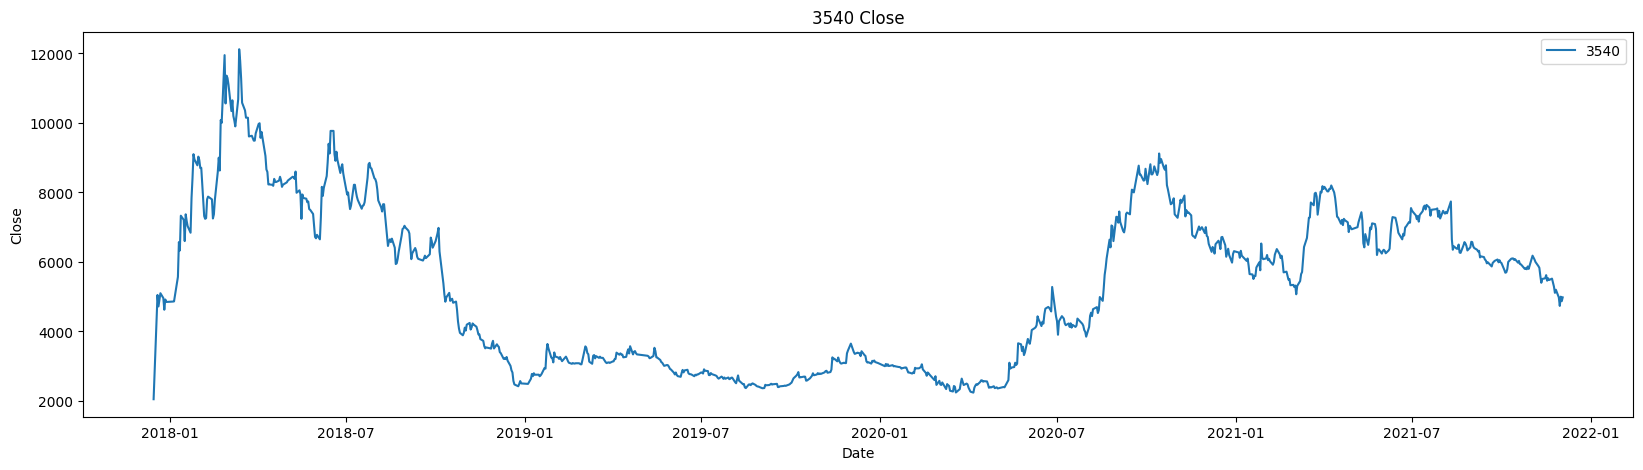

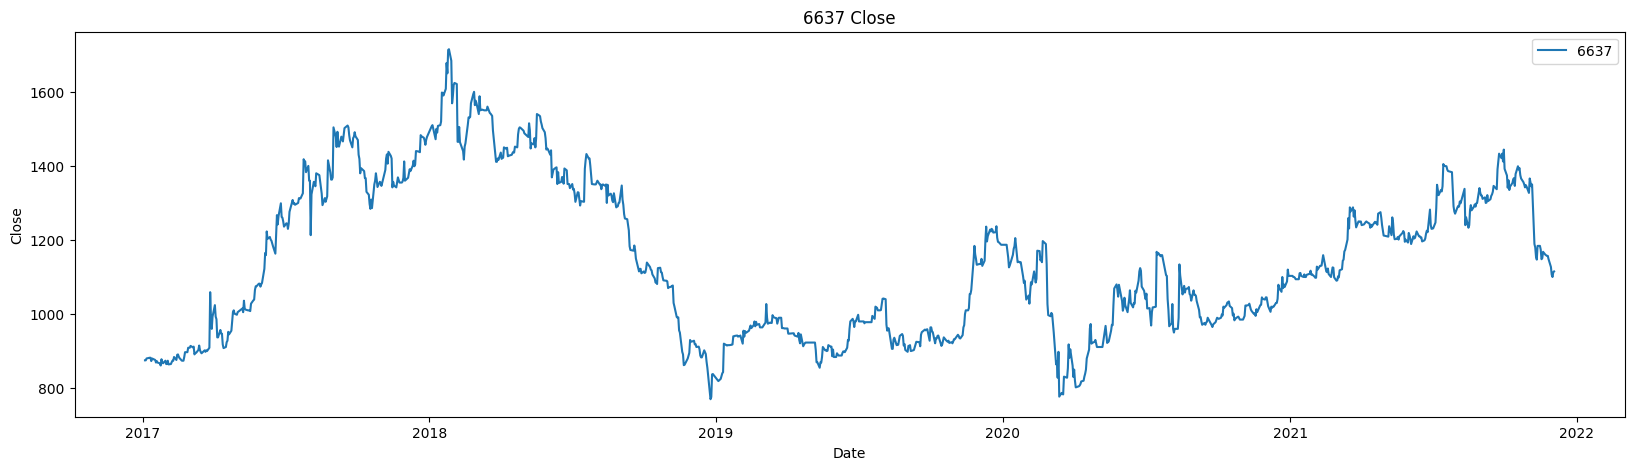

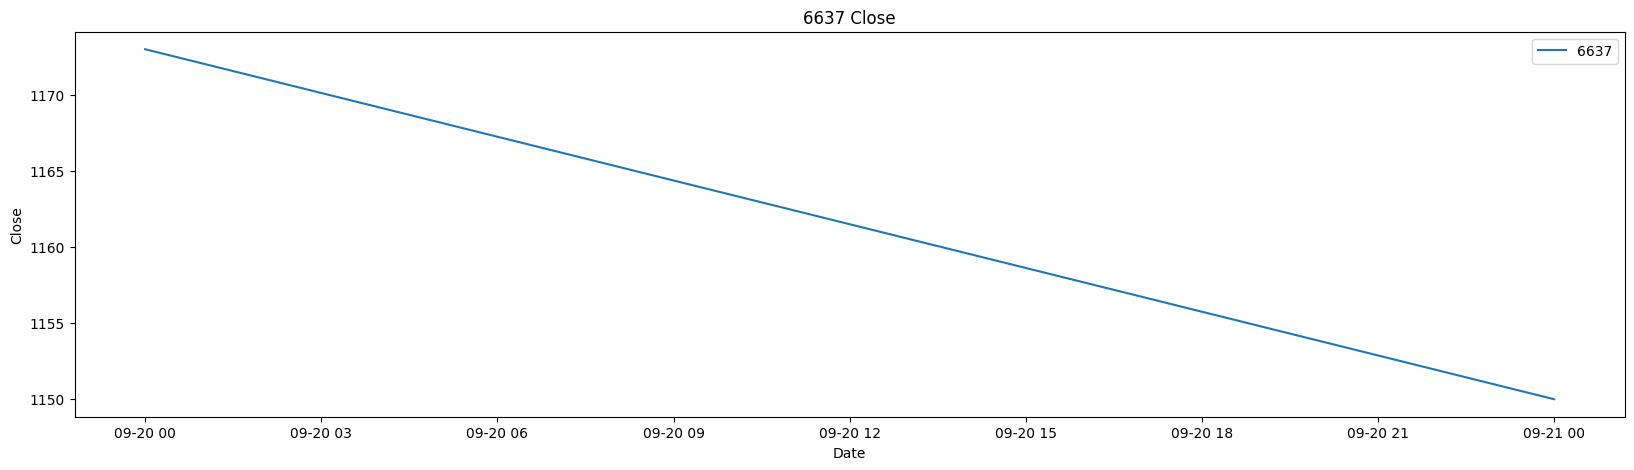

In [53]:
codes = w_flag.SecuritiesCode.unique()

for code in codes[:3]:
    plot_stock(prices, code)
    plot_stock(w_flag, code)
    plt.show()

In [54]:
date = w_flag.Date
date_desc = date.describe(datetime_is_numeric=True)
date_min = date_desc.loc['min']
date_max = date_desc.loc['max']
print('Data from {:%Y-%m-%d} to {:%Y-%m-%d}'
        .format(date_min, date_max))
print('Data observations {} '.format(
                 date.nunique()))

Data from 2017-03-15 to 2021-12-03
Data observations 1132 


the flags are set for the whole period of time

- how long has a stock a flag?

In [55]:
flag_day = {}
for code in codes: 
    current = df_security_code(w_flag, code)
    #current = w_flag.query('SecuritiesCode == @ code')
    date = current.Date
    date_desc = date.describe(datetime_is_numeric=True)
    date_min = date_desc.loc['min']
    date_max = date_desc.loc['max']
    flag_day[code] = [date_min, date_max, date.nunique()]


In [56]:
flag_stats = pd.DataFrame(flag_day).T
flag_stats.columns = ['start_flag', 'end_flag', 'days_w_flag']
flag_stats

,start_flag,end_flag,days_w_flag
6502,2017-03-15,2017-10-11,143
3540,2017-11-13,2021-12-03,989
6637,2018-09-20,2018-09-21,2
6465,2018-12-14,2018-12-27,9
7868,2019-01-17,2019-04-09,57
6067,2019-09-13,2019-09-26,8
6470,2019-09-17,2019-09-30,9
4526,2020-10-15,2020-10-28,10
5008,2020-12-15,2021-02-16,42
5486,2021-04-28,2021-12-03,147


encode flag: 

In [57]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(prices["SupervisionFlag"])
prices["SupervisionFlag"]=enc.transform(prices["SupervisionFlag"])

In [58]:
prices.SupervisionFlag.value_counts()

0    2331036
1       1495
Name: SupervisionFlag, dtype: int64

### Volume

In [59]:
missingValues(prices.Volume)

 missing Values: 0 (0.0%)


In [60]:
prices['Vol_Close'] = prices['Volume'] * prices['Close']

securities with high volume_cost

In [61]:
volumen_stock = prices.groupby('SecuritiesCode').sum()
top10 = volumen_stock.sort_values('Vol_Close', ascending=False).reset_index().head(10)
top10.SecuritiesCode

0    9984
1    7974
2    7203
3    9983
4    6758
5    8306
6    8035
7    8316
8    6861
9    6954
Name: SecuritiesCode, dtype: int64

List of the top 10 Codes with high volume and close price

In [62]:
stock_list = pd.read_csv('../data/stock_list.csv', parse_dates=['EffectiveDate', 'TradeDate'])
stock_list_top10 = stock_list[stock_list['SecuritiesCode'].isin(top10.SecuritiesCode.to_list())]

stock_list_top10

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
2804,6758,2021-12-30,SONY GROUP CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,14475.0,1.261082e+09,1.825416e+13,True
2867,6861,2021-12-30,KEYENCE CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,72280.0,2.432077e+08,1.757905e+13,True
2925,6954,2021-12-30,FANUC CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,24380.0,2.019094e+08,4.922551e+12,True
3065,7203,2021-12-30,TOYOTA MOTOR CORPORATION,First Section (Domestic),Prime Market,3700,Transportation Equipment,6,AUTOMOBILES & TRANSPORTATION EQUIPMENT,1,TOPIX Core30,20211230.0,2105.5,1.631499e+10,3.435121e+13,True
3535,7974,2021-12-30,"Nintendo Co.,Ltd.",First Section (Domestic),Prime Market,3800,Other Products,10,"IT & SERVICES, OTHERS",1,TOPIX Core30,20211230.0,53650.0,1.298690e+08,6.967472e+12,True
3577,8035,2021-12-30,Tokyo Electron Limited,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,66280.0,1.572109e+08,1.041994e+13,True
3732,8306,2021-12-30,"Mitsubishi UFJ Financial Group,Inc.",First Section (Domestic),Prime Market,7050,Banks,15,BANKS,1,TOPIX Core30,20211230.0,624.9,1.328200e+10,8.299919e+12,True
3735,8316,2021-12-30,"Sumitomo Mitsui Financial Group,Inc.",First Section (Domestic),Prime Market,7050,Banks,15,BANKS,1,TOPIX Core30,20211230.0,3943.0,1.374362e+09,5.419110e+12,True
4403,9983,2021-12-30,"FAST RETAILING CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,2,TOPIX Large70,20211230.0,65310.0,1.060737e+08,6.927670e+12,True
4404,9984,2021-12-30,SoftBank Group Corp.,First Section (Domestic),Prime Market,5250,Information & Communication,10,"IT & SERVICES, OTHERS",1,TOPIX Core30,20211230.0,5434.0,1.722954e+09,9.362531e+12,True


### Seasonality

descompose sesonality

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonality(df, feature):
        #df_code[f'logprice_' + feature] = np.log(df_code[feature])


        decomposition = seasonal_decompose(x=df[feature], 
                                   model='additive',
                                   period=30)

        df[f'detrend_' + feature] = decomposition.observed
        df[f'trend_' + feature] = decomposition.trend
        df[f'season_' + feature] = decomposition.seasonal
        df[f'error_' + feature] = decomposition.resid

In [64]:
df_code = df_security_code(prices, 8198)
df_code.ffill(inplace=True)
df_code.dropna(inplace=True)

seasonality(df_code, 'Close')

In [65]:
#df_code.columns
cols = ['Close', 'detrend_Close', 'trend_Close', 'season_Close',
       'error_Close']
df_code[cols].head()


,Close,detrend_Close,trend_Close,season_Close,error_Close
64894,1965.0,1965.0,NaN,0.993188,NaN
66759,1952.0,1952.0,NaN,-2.131373,NaN
68625,1852.0,1852.0,NaN,-2.602426,NaN
70491,1848.0,1848.0,NaN,2.503276,NaN
72357,1851.0,1851.0,NaN,-7.070847,NaN


### Target
Change ratio of adjusted closing price between t+2 and t+1 where t+0 is TradeDate <br>
r(k,t) = C(k, t+2) - C(k, t+1) / C(k, t+1)

- adjusted stock price is used

In [72]:
rank = prices.Target

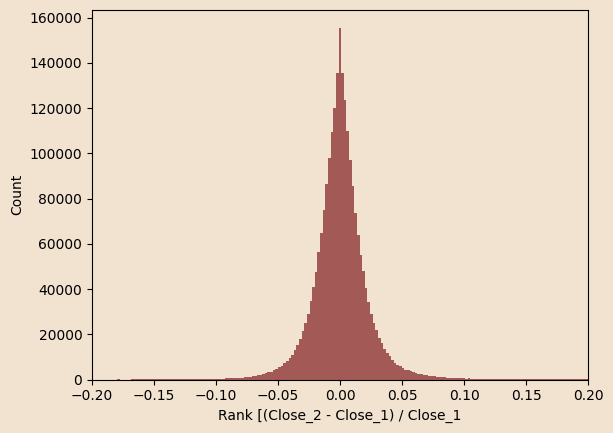

<Figure size 400x400 with 0 Axes>

In [111]:

#plt.rcdefaults()
fig, ax = plt.subplots()

plt.figure(figsize=(4,4))
ax.hist(rank, bins=800,color='#A35956')
#ax.ticklabel_format(axis='both', style='sci')
ax.set_xlim([-0.2, 0.2])
ax.set_xlabel('Rank [(Close_2 - Close_1) / Close_1')
ax.set_ylabel('Count')

ax.set_facecolor('#F2E3D1')
fig.patch.set_facecolor('#F2E3D1')
plt.rcParams["font.family"] = "Hind Siliguri"

target for a stock

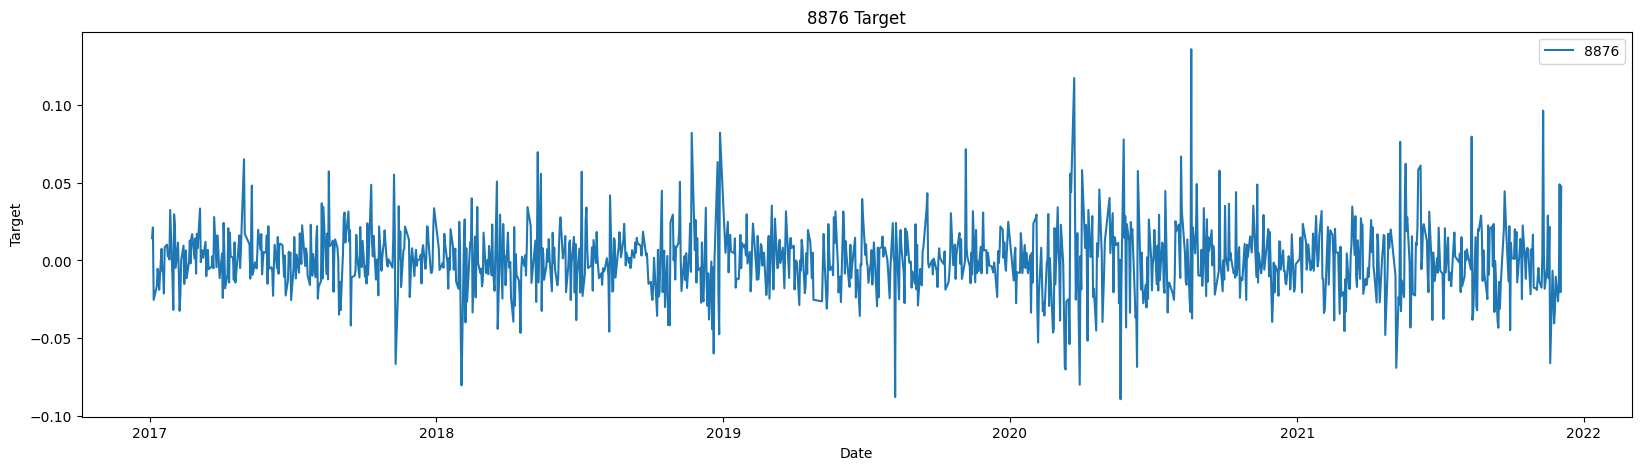

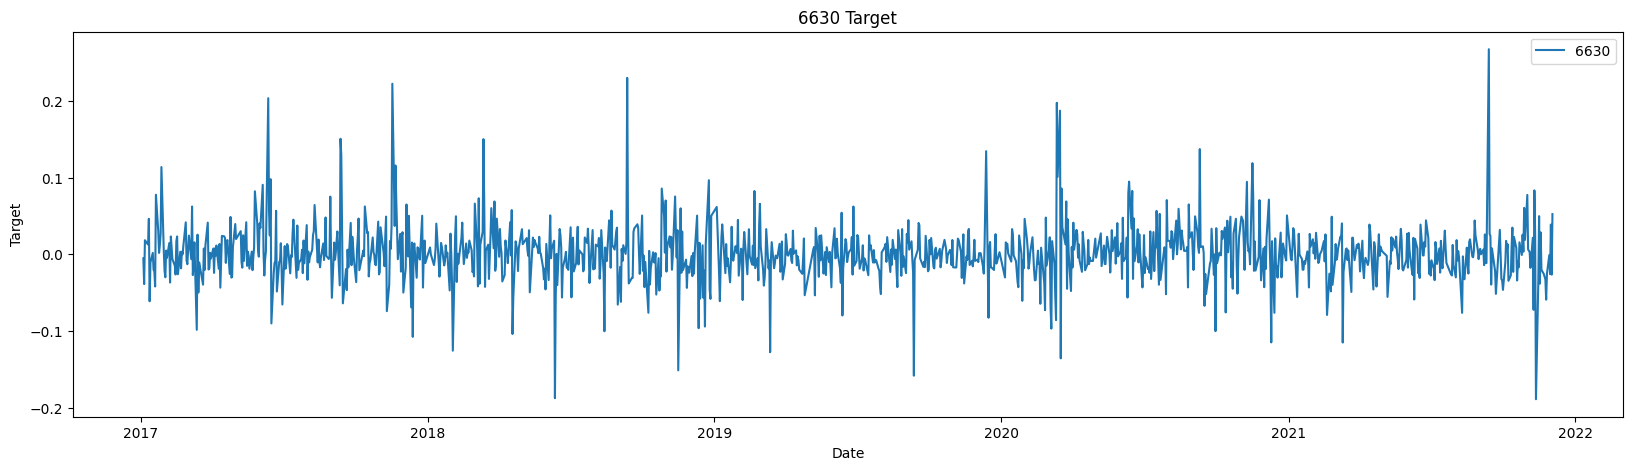

In [67]:
for i in [8876, 6630]:#, 2761, 2753]:
    plot_stock(prices, i, 'Target')

#### - Rank
for each day

In [68]:
prices_rank = pd.DataFrame(columns = prices.columns)

In [69]:
# only one day
def calculate_rank(df, day):
    df = prices[(prices['Date']== day)]
    df.loc[:, 'Rank'] = df['Target'].rank(ascending=False, method='first') - 1
    
    return df

df = calculate_rank(prices, prices.Date.unique()[0])
one_day_rank = pd.concat([prices_rank, df], axis=0)



In [70]:
def daily_spread_return(df, day):
    # calculate rank 
    df = prices[(prices['Date']== day)]
    df.loc[:, 'Rank'] = df['Target'].rank(ascending=False, method='first') - 1

    # calculate weights and weighted_target
    weights = np.linspace(start = 2, stop=1, num=200)

    # sum_up
    top200 = df.sort_values('Rank').iloc[:200,:]
    top200['Weights'] = weights
    top200['weigh_Target'] = top200['Target'] * top200['Weights']
    sum_up = top200['weigh_Target'].sum()/top200['Weights'].mean()

    # sum_down
    bottom200 = one_day_rank.sort_values('Rank').iloc[-200:,:].sort_values('Rank', ascending=False)
    bottom200['Weights'] = np.linspace(start = 2, stop=1, num=200)
    bottom200['weigh_Target'] = bottom200['Target'] * bottom200['Weights']
    sum_down = bottom200['weigh_Target'].sum()/bottom200['Weights'].mean()

    # return daily_spread return
    return  df.SecuritiesCode.nunique(), sum_up - sum_down

In [71]:
stocks_per_day = {}

def calculate_rank(df, day):
    df = prices[(prices['Date']== day)]
    df.loc[:, 'Rank'] = df['Target'].rank(ascending=False, method='first') - 1
    
    return df

prices_rank = pd.DataFrame(columns = prices.columns)

for day in tqdm(prices.Date.unique()):
    stocks, dsr = daily_spread_return(prices, day)
    stocks_per_day[day] = [stocks, dsr]

 94%|█████████▍| 1128/1202 [00:13<00:00, 81.25it/s]


KeyboardInterrupt: 

In [ ]:
stocks_day = pd.DataFrame(stocks_per_day).T
stocks_day.columns = ['SecuritiesCode_s', 'daily_spread_return']
stocks_day

In [ ]:
del prices

## Trades

In [ ]:
trades = pd.read_csv('../data/train_files/trades.csv')
print_shape(trades)

In [ ]:
del trades

# Features engineering

In [ ]:
prices = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=[1])

## 1. Fillnan forwardfill

## 2. Adjusted prices
to calculate theoretical price/volume when split/reverse-split happens (NOT including dividend/allotment of shares/)

In [ ]:
prices.AdjustmentFactor.unique()

- amount of stocks for each adjustment factor

In [ ]:

for i in sorted(prices.AdjustmentFactor.unique()):
    print( 'adjustment factor = {}   \t:  {} trades'.format(
        round(i,2), prices[(prices['AdjustmentFactor']==i)].Date.count()
    ))
   

calcule the adjusted price

In [ ]:
def adjust_price(df):
    # cumulative adjustment factor considering the day shift
    df.sort_values('Date')
    df.loc[:,'CAF'] = df['AdjustmentFactor'].cumprod().shift(1)
    # fill nan values
    df.CAF.fillna(1, inplace=True)
    # prices to be adjusted
    prices =[ 'Open', 'High', 'Low', 'Close']

    for x in prices:
        df.loc[:,'ad_' + str(x)]  = df[x] / df['CAF']
    
    # adjust volume
    df['ad_Volume'] = df['Volume'] * df['CAF']
    df.drop('CAF', axis=1, inplace=True)

     # adjust target
    df.sort_values('Date')
    df['ad_Close_1'] = df['ad_Close'].shift(-1)
    df['ad_Close_2'] = df['ad_Close'].shift(-2)
    df['ad_Target'] = (df['ad_Close_2']-df['ad_Close_1'])/df['ad_Close_1']
    df.drop(['ad_Close_1', 'ad_Close_2'], axis=1, inplace=True)

    return df

In [ ]:
# create an empty new DataFrame
adjusted_data = pd.DataFrame(columns = prices.columns)

for i in tqdm([8876, 6630, 7453, 7638]): #tqdm(prices.SecuritiesCode.unique()):
    df = prices.query('SecuritiesCode ==@i')
    adjusted_df = adjust_price(df)
    adjusted_data = pd.concat([adjusted_data, adjusted_df ], axis=0)

In [ ]:
def plot_adstock(df, Code):
    single_stock = df.query('SecuritiesCode==@Code')
    plt.figure(figsize=(20,5))
    sns.lineplot(data=single_stock, y='Close', x='Date')
    ax2 = plt.twinx()
    sns.lineplot(data=single_stock, y='ad_Close', x='Date', color='red')


In [ ]:
for i in [8876, 6630, 7453, 7638]:
    plot_adstock(adjusted_data, i)

../data/train_files/stock_prices_ad.csvthe adjusted value was calculated with process_adjusted_price.py and save in : 

In [ ]:
adjusted_data = pd.read_csv('../data/train_files/stock_prices_ad.csv', parse_dates=[2], index_col=0)
adjusted_data.head(2)

- close distribution

In [ ]:
sns.histplot(adjusted_data.ad_Close, bins=100)

In [ ]:
pd.DataFrame(adjusted_data.ad_Close.describe()).T

In [ ]:
codes = [6861, 6920, 9983, 3962, 4488]
for cod in codes:
    #df_code = df_security_code(adjusted_data, cod)
    #plt.figure(figsize = (20,5))
    plot_stock(adjusted_data, cod, feature='ad_Close')

In [ ]:
stock_group = adjusted_data.groupby('SecuritiesCode').mean()
sns.histplot(stock_group.ad_Close, bins=100)

- 100 cheapest stocks

In [ ]:
sns.histplot(stock_group.sort_values('ad_Close', ascending=False).ad_Close[100:], bins=100) 

- 100 more expensive


In [ ]:
sns.histplot(stock_group.sort_values('ad_Close', ascending=True).ad_Close[10:]) 

In [ ]:
stock_group.sort_values('ad_Close', ascending=True).tail(10)

## 5. Close, Open, High and Low price lag 1


In [ ]:
features = ['ad_Close', 'ad_Open', 'ad_High' , 'ad_Low', 'ad_Volume']
new_features = [x + "_lag1" for x in features]

feat_data = pd.DataFrame(columns = adjusted_data.columns)

def feature_lag(df, features, lag=1):
    for feat in features:
        name = feat + "_lag" +str(lag)
        df[name] = df[str(feat)].shift(lag)
        #new_features.append(name)
    return df

for i in adjusted_data.SecuritiesCode[:3]:
    df = adjusted_data.query('SecuritiesCode ==@i')
    df = feature_lag(df, features)



In [ ]:
df[new_features + features].head()

## 3. RSI

In [ ]:
def rsi (df_serie,periods = 14, ema = True): 
    """Relative Strength Index
        RSI = 100–(100/1 + RS) ; RS = Av Gain / Av loss
    Args:
        df_serie (_type_): series of ad_Close
        periods (int, optional): 5,7,9,14,21,30 Defaults to 14.
        ema (bool, optional): _description_. Defaults to True.

    Returns:
        pd.Series: _description_
    """
        
    close_delta = df_serie.diff() # .dropna()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)

    if ema == True: # exponential moving average
        ma_up = up.ewm(com= periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        
    else: # using moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.ewm(window = periods, adjust=False).mean()
        
    rs = ma_up / ma_down
    rsi = 100 - (100 / (1+rs))

    return rsi

In [ ]:
df = df_security_code(adjusted_data,8194 )
df['RSI'] = rsi(df['ad_Close'])

In [ ]:
df[['Date','ad_Close', 'RSI']][14:].head()

In [ ]:
from functions import plot_stock

plot_stock(df, 8194 ,'RSI')
ax2 = plt.twinx()
plot_stock(df, 8194 ,'ad_Close')

## 4. Return

In [ ]:
df['Return'] = df['ad_Close'].pct_change()
#adjusted_data['Return_m'] = adjusted_data['ad_Close'].resample('M').ffill().pct_change()


In [ ]:
plot_stock(df, 8194, 'Return')

In [ ]:
# cumulative
df['cum_Return'] = (df['Return'] + 1).cumprod()
plot_stock(df, 8194, 'cum_Return')

## 5. Simple moving average





In [ ]:
# ussualy period 10 or 5
# setting for all prices


features = ['ad_Close', 'ad_Open', 'ad_High' , 'ad_Low', 'ad_Volume']
new_features = [x + "_sma10" for x in features]

feat_data = pd.DataFrame(columns = adjusted_data.columns)

def SMA(df, features, period=10):
    for feat in features:
        name = feat + "_sma" + str(period)
        df[name] = df[feat].rolling(window=period).mean()  # only for close or for all values?
        #new_features.append(name)
    return df


df = adjusted_data.query('SecuritiesCode == 8194')
df = SMA(df, features)

In [ ]:
df[features +  new_features][20:].head(5)

## 6. MACD : The Moving Average Convergence Divergence 



In [ ]:

def macd(df):
    ema26 = df['ad_Close'].ewm(span=26, adjust=False, min_periods=26).mean()
    ema12 = df['ad_Close'].ewm(span=12, adjust=False, min_periods=12).mean()

    macd = ema12 - ema26

    # Get the 9-Day EMA of the MACD for the Trigger line

    macd_ema9 = macd.ewm(span=9, adjust=False, min_periods=9).mean()

    # calculate the difference
    macd_diff = macd - macd_ema9

    df['macd'] = df.index.map(macd)
    df['macd_h'] = df.index.map(macd_diff)
    df['macd_s'] = df.index.map(macd_ema9)

    return df

In [ ]:
df = df_security_code(adjusted_data, 8194)
df = macd(df)

In [ ]:
df[['Date', 'ad_Close', 'macd', 'macd_h',	'macd_s']].tail()

In [ ]:

plot_stock(df, 8194, 'ad_Close')
plot_stock(df, 8194, 'macd')